## 1. Targeting treatment for heart disease patients
<p>Clustering algorithms are used to group together items that are similar to one another. There are many industries where it would be beneficial and insightful to use an unsupervised learning algorithm - retailers want to group similar customers for targeted ad campaigns, biologists want to find plants that share similar characteristics, and more. We are going to explore if it would be appropriate to use some clustering algorithms to group medical patients. </p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_552/img/images-3.jpeg" alt=""></p>
<p>We are going to look at anonymized patients who have been diagnosed with heart disease. Patients with similar characteristics might respond to the same treatments, and doctors would benefit from learning about the outcomes of patients similar to those they are treating. The data we are analyzing comes from the V.A. Medical Center in Long Beach, CA. For more information, see <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names">here</a>. </p>
<p>Before beginning a project, it is important to get an idea of what the patient data looks like. In addition, the clustering algorithms used below require that the data be numeric, so it is necessary to ensure the patient data doesn't need any transformations. You will also be brushing up on your base R skills for some analysis.</p>

In [1]:
# loading the data
heart_disease <- read.csv("heart_disease_patients.csv")

# print the first ten rows of the data set
head(heart_disease, 10)

# check that only numeric variables
lapply(heart_disease, class)

id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
1,63,1,1,145,233,1,2,150,0,2.3,3
2,67,1,4,160,286,0,2,108,1,1.5,2
3,67,1,4,120,229,0,2,129,1,2.6,2
4,37,1,3,130,250,0,0,187,0,3.5,3
5,41,0,2,130,204,0,2,172,0,1.4,1
6,56,1,2,120,236,0,0,178,0,0.8,1
7,62,0,4,140,268,0,2,160,0,3.6,3
8,57,0,4,120,354,0,0,163,1,0.6,1
9,63,1,4,130,254,0,2,147,0,1.4,2
10,53,1,4,140,203,1,2,155,1,3.1,3


$id
[1] "integer"

$age
[1] "integer"

$sex
[1] "integer"

$cp
[1] "integer"

$trestbps
[1] "integer"

$chol
[1] "integer"

$fbs
[1] "integer"

$restecg
[1] "integer"

$thalach
[1] "integer"

$exang
[1] "integer"

$oldpeak
[1] "numeric"

$slope
[1] "integer"

In [2]:
str(heart_disease)

'data.frame':	303 obs. of  12 variables:
 $ id      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age     : int  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : int  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : int  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: int  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : int  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : int  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : int  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : int  3 2 2 3 1 1 3 1 2 3 ...


## 2. Quantifying patient differences
<p>It is important to conduct some exploratory data analysis to familiarize ourselves with the data before clustering. This will help us learn more about the variables and make an informed decision about whether we should scale the data. Because k-means and hierarchical clustering measures similarity between points using a distance formula, it can place extra emphasis on certain variables that have a larger scale and thus larger differences between points.</p>
<p>Exploratory data analysis helps us to understand the characteristics of the patients in the data. We need to get an idea of the value ranges of the variables and their distributions. This will also be helpful when we evaluate the clusters of patients from the algorithms. Are there more patients of one gender? What might an outlier look like?</p>

In [36]:
# evidence that the data should be scaled?
summary(heart_disease)

# remove id
heart_disease = heart_disease[ , !(names(heart_disease) %in% c('id'))]

## scaling data and saving as a data frame
scaled <- scale(heart_disease)

# Checking to see how the data looks
summary(scaled)

       id             age             sex               cp       
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000  
 Median :152.0   Median :56.00   Median :1.0000   Median :3.000  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   Mean   :3.158  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000  
 Max.   :303.0   Max.   :77.00   Max.   :1.0000   Max.   :4.000  
    trestbps          chol            fbs            restecg      
 Min.   : 94.0   Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :130.0   Median :241.0   Median :0.0000   Median :1.0000  
 Mean   :131.7   Mean   :246.7   Mean   :0.1485   Mean   :0.9901  
 3rd Qu.:140.0   3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.0000   Max.   :2.0000  
    thalach          exang           oldpeak         slope      
 Min

      age               sex                cp             trestbps       
 Min.   :-2.8145   Min.   :-1.4549   Min.   :-2.2481   Min.   :-2.14149  
 1st Qu.:-0.7124   1st Qu.:-1.4549   1st Qu.:-0.1650   1st Qu.:-0.66420  
 Median : 0.1727   Median : 0.6851   Median :-0.1650   Median :-0.09601  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7259   3rd Qu.: 0.6851   3rd Qu.: 0.8765   3rd Qu.: 0.47218  
 Max.   : 2.4961   Max.   : 0.6851   Max.   : 0.8765   Max.   : 3.88132  
      chol              fbs             restecg             thalach       
 Min.   :-2.3310   Min.   :-0.4169   Min.   :-0.995103   Min.   :-3.4364  
 1st Qu.:-0.6894   1st Qu.:-0.4169   1st Qu.:-0.995103   1st Qu.:-0.7041  
 Median :-0.1100   Median :-0.4169   Median : 0.009951   Median : 0.1483  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.000000   Mean   : 0.0000  
 3rd Qu.: 0.5467   3rd Qu.:-0.4169   3rd Qu.: 1.015005   3rd Qu.: 0.7166  
 Max.   : 6.1283   Max.   : 2.39

## 3. Let's start grouping patients
<p>Once we've figured out if we need to modify the data and made any necessary changes, we can now start the clustering process. For the k-means algorithm, it is necessary to select the number of clusters in advance.</p>
<p>It is also important to make sure that your results are reproducible when conducting a statistical analysis. This means that when someone runs your code on the same data, they will get the same results as you reported. Therefore, if you're conducting an analysis that has a random aspect, it is necessary to set a seed to ensure reproducibility.</p>
<p>Reproducibility is especially important since doctors will potentially be using our results to treat patients. It is vital that another analyst can see where the groups come from and be able to verify the results. </p>

In [37]:
# set the seed so that results are reproducible 
seed_val = 10
set.seed(seed_val)

# select a number of clusters
k = 5

# run the k-means algorithms
first_clust = kmeans(scaled, centers=k, nstart = 1)

# How many patience does each group have?
first_clust$size


[1] 66 43 88 61 45

## 4. Another round of k-means
<p>Because the k-means algorithm initially selects the cluster centers by randomly selecting points, different iterations of the algorithm can result in different clusters being created. If the algorithm is truly grouping together similar observations (as opposed to clustering noise), then cluster assignments will be somewhat robust between different iterations of the algorithm. </p>
<p>With regards to the heart disease data, this would mean that the same patients would be grouped together even when the algorithm is initialized at different random points. If patients are not in similar clusters with various algorithm runs, then the clustering method isn't picking up on meaningful relationships between patients. </p>
<p>We're going to explore how the patients are grouped together with another iteration of the k-means algorithm. We will then be able to compare the resulting groups of patients. </p>

In [38]:
# set the seed
seed_val = 38
set.seed(seed_val)

# run the k-means algorithms
k = 5
snd_clust = kmeans(scaled, centers=k, nstart=1)

# how many patients are in each group
snd_clust$size

[1] 65 43 61 46 88

## 5. Comparing patient clusters
<p>It is important that the clusters resulting from the k-means algorithm are stable. Even though the algorithm begins by randomly initializing the cluster centers, if the k-means algorithm is the right choice for the data, then different initializations of the algorithm will result in similar clusters.</p>
<p>The clusters from different iterations may not be exactly the same, but the clusters should be roughly the same size and have similar distributions of variables. If there is a lot of change in clusters between different iterations of the algorithm, then k-means clustering is not a good choice for the data. </p>
<p>It is not possible to validate that the clusters obtained from an algorithm are ground truth are accurate since there is no true labeling for patients. Thus, it is necessary to examine how the clusters change between different iterations of the algorithm. We're going to use some visualizations to get an idea of the cluster stabilities. That way we can see how certain patient characteristics may have been used to group patients together.</p>

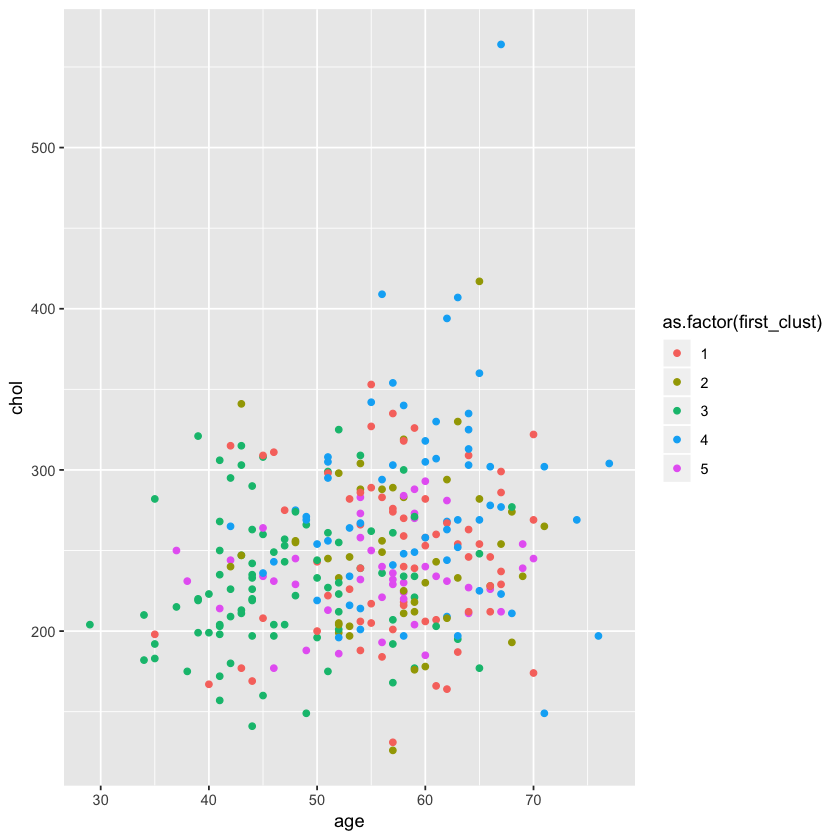

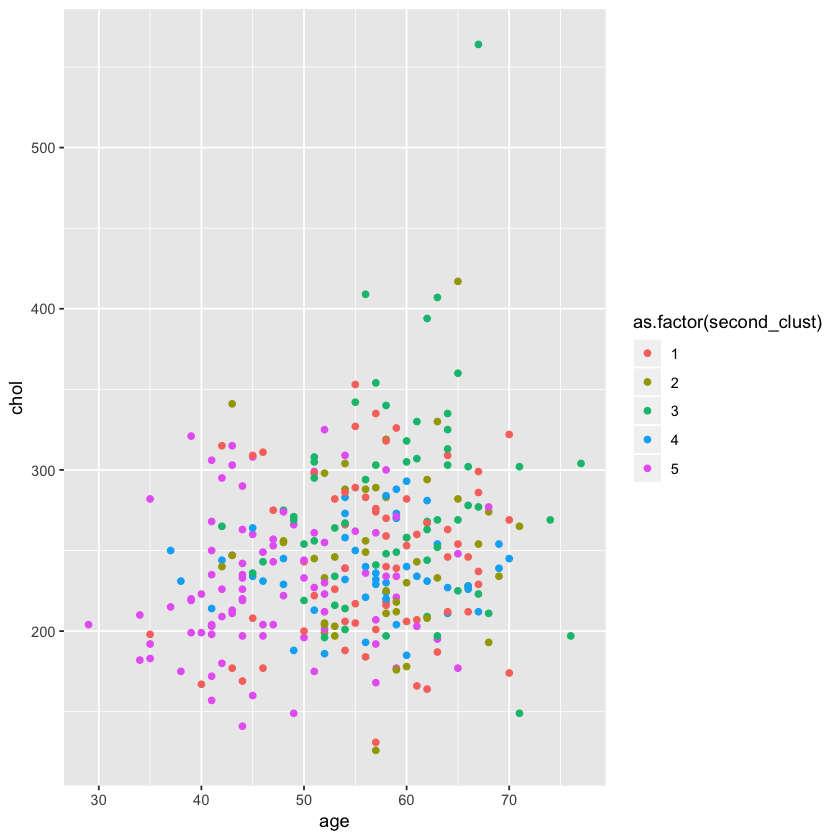

In [39]:
# adding cluster assignments to the data
heart_disease['first_clust'] = first_clust$cluster
heart_disease['second_clust'] = snd_clust$cluster

# load ggplot2
library(ggplot2)

# creating the plots of age and chol for the first clustering algorithm
plot_one = ggplot(heart_disease, aes(x=age, y=chol, color=as.factor(first_clust))) + geom_point()
plot_one 

# creating the plots of age and chol for the second clustering algorithm
plot_two = ggplot(heart_disease, aes(x=age, y=chol, color=as.factor(second_clust))) + geom_point()
plot_two

## 6. Hierarchical clustering: another clustering approach
<p>An alternative to k-means clustering is hierarchical clustering. This method works well when the data has a nested structure. It is possible that the data from heart disease patients follows this type of structure. For example, if men are more likely to exhibit certain characteristics, those characteristics might be nested inside the gender variable. Hierarchical clustering also does not require the number of clusters to be selected prior to running the algorithm. </p>
<p>Clusters can be selected by using the dendrogram. The dendrogram allows one to see how similar observations are to one another and are useful in selecting the number of clusters to group the data. It is now time for us to see how hierarchical clustering groups the data. </p>

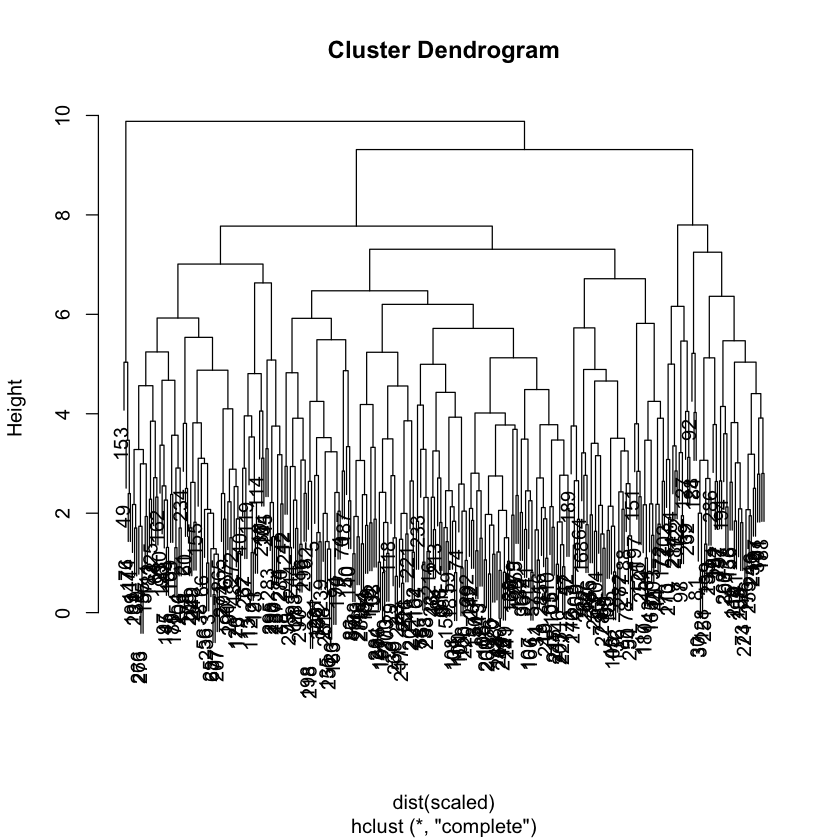

In [40]:
# executing hierarchical clustering with complete linkage
hier_clust_1 = hclust(dist(scaled), method= 'complete')

# printing the dendrogram
plot(hier_clust_1)

# getting cluster assignments based on number of selected clusters
hc_1_assign <- cutree(hier_clust_1, 5)

## 7. Comparing clustering results
<p>The doctors are interested in grouping similar patients together in order to determine appropriate treatments. Therefore, they want to have clusters with more than a few patients to see different treatment options. While it is possible for a patient to be in a cluster by themselves, this means that the treatment they received might not be recommended for someone else in the group. </p>
<p>As with the k-means algorithm, the way to evaluate the clusters is to investigate which patients are being grouped together. Are there patterns evident in the cluster assignments or do they seem to be groups of noise? We're going to examine the clusters resulting from the two hierarchical algorithms. </p>

In [49]:
# adding assignments of chosen hierarchical linkage
heart_disease['hc_clust'] = hc_1_assign

# remove 'sex', 'first_clust', and 'second_clust' variables
hd_sample <- heart_disease[, !(names(heart_disease) %in% c('first_clust', "second_clust", "sex"))]

# getting mean and standard deviation summary statistics
clust_summary <- do.call(data.frame, aggregate(. ~hc_clust, data=hd_sample, function(x) c(avg=mean(x), sd=sd(x))))
clust_summary                                               

hc_clust,age.avg,age.sd,cp.avg,cp.sd,trestbps.avg,trestbps.sd,chol.avg,chol.sd,fbs.avg,...,restecg.avg,restecg.sd,thalach.avg,thalach.sd,exang.avg,exang.sd,oldpeak.avg,oldpeak.sd,slope.avg,slope.sd
1,51.41667,8.540979,2.783333,0.9470625,129.1389,15.93800,239.8722,42.29228,0.1222222,...,0.8444444,0.9905826,161.5722,15.779214,0.07777778,0.2685686,0.555000,0.7847196,1.388889,0.5730336
2,58.11111,7.754246,3.763889,0.6165112,130.0417,13.90657,253.2222,49.74476,0.1805556,...,1.4027778,0.9140488,135.5417,17.991342,0.81944444,0.3873488,1.451389,1.0804268,1.750000,0.5240686
3,61.00000,3.908034,3.916667,0.2886751,168.5000,17.45904,284.9167,53.00336,0.3333333,...,1.2500000,0.9653073,147.7500,13.157266,0.75000000,0.4522670,2.316667,1.4708274,2.166667,0.5773503
4,59.00000,9.203580,3.571429,0.8501112,134.7714,18.64070,233.8571,49.67136,0.1428571,...,0.6857143,0.9321521,116.8857,17.842071,0.48571429,0.5070926,2.240000,1.3856831,2.200000,0.4058397
5,64.75000,2.061553,3.250000,0.5000000,138.7500,18.42779,433.7500,89.93470,0.2500000,...,2.0000000,0.0000000,156.2500,3.774917,0.00000000,0.0000000,1.100000,0.3829708,1.500000,0.5773503


## 8. Visualizing the cluster contents
<p>In addition to looking at the distributions of variables in each of the hierarchical clustering run, we will make visualizations to evaluate the algorithms. Even though the data has more than two dimensions, we can get an idea of how the data clusters by looking at a scatterplot of two variables. We want to look for patterns that appear in the data and see what patients get clustered together. </p>

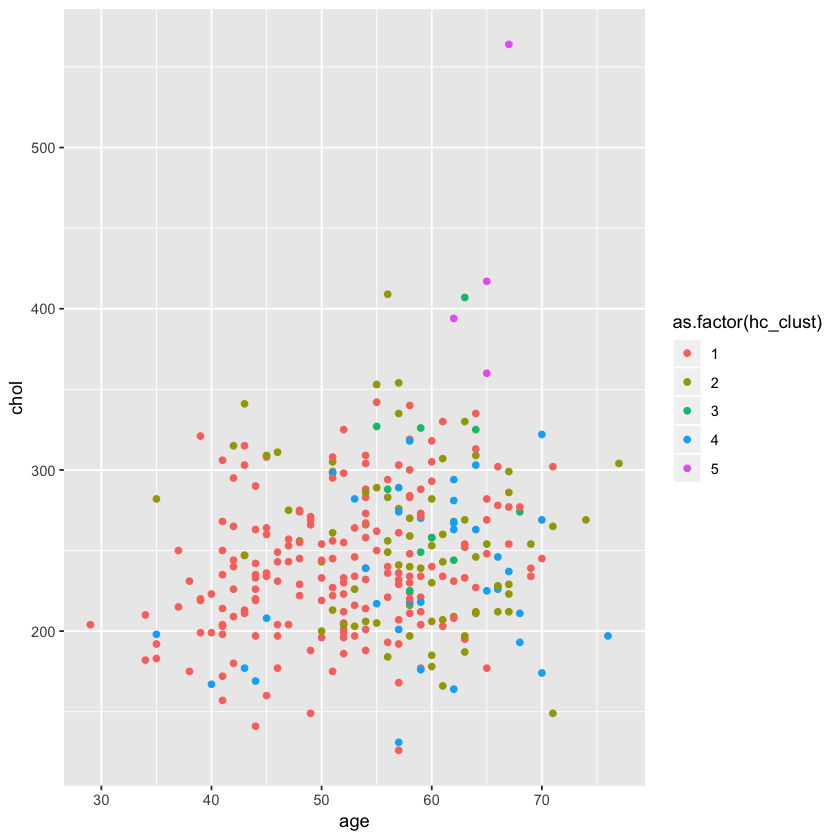

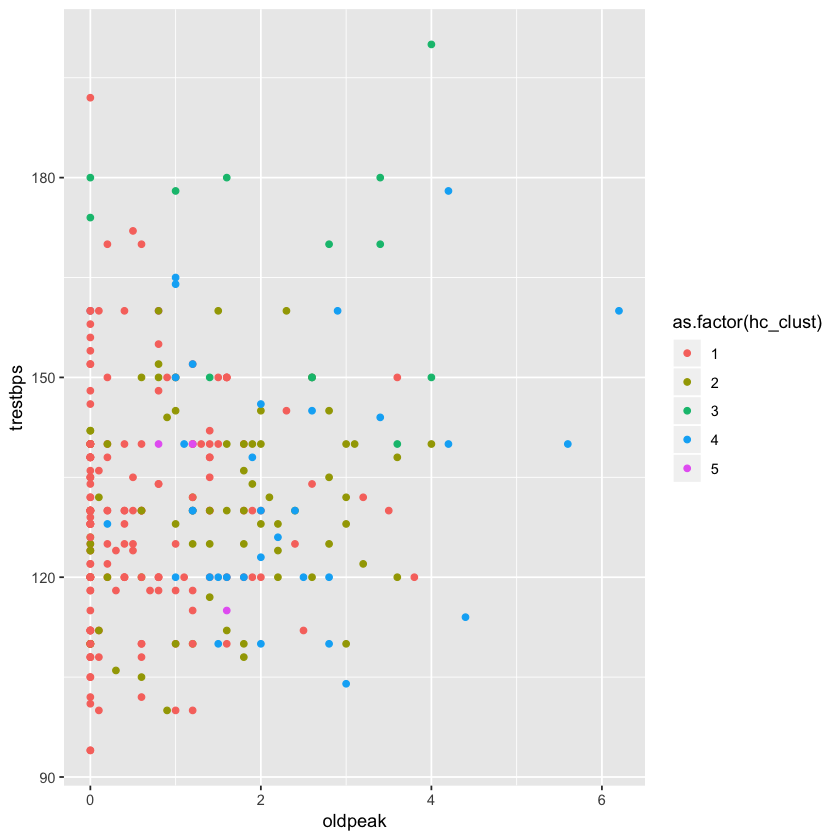

In [51]:
# plotting age and chol
plot_one = ggplot(hd_sample, aes(x=age, y=chol, color=as.factor(hc_clust))) + geom_point()
plot_one 

# plotting oldpeak and trestbps
plot_two = ggplot(hd_sample, aes(oldpeak, trestbps, color=as.factor(hc_clust))) + geom_point()
plot_two